In [ ]:
'''
 * Copyright (c) 2005 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

### Competitive Networks

## Objectives

The Hamming network, introduced in Chapter 3, demonstrated one technique for using a neural network for pattern recognition. It required that the prototype patterns be known beforehand and incorporated into the network as rows of a weight matrix. In this chapter, we will discuss networks that are very similar in structure and operation to the Hamming network. 

Unlike the Hamming network, however, they use the associative learning rules of Chapter 15 to adaptively learn to classify patterns. Three such networks are introduced in this chapter:

1. **Competitive Network**: A simple model that uses competition among neurons to classify input patterns.
2. **Self-Organizing Feature Map (SOFM)**: This network incorporates a topology, allowing for a structured representation of the input space.
3. **Learning Vector Quantization (LVQ)**: A method that integrates competition within a supervised learning framework.

These networks are mathematically more tractable than the Grossberg networks and provide a good introduction to competitive learning.

## Key Concepts

1. **Competitive Network**: 
   - In a competitive network, only the neuron with the highest activation in response to a given input pattern is allowed to update its weights. This competitive learning mechanism enables the network to adaptively categorize inputs.

   $$ \text{Output} = \arg\max_i (w_i^T x) $$

   where $ w_i $ represents the weight vector of the $i$-th neuron and $x$ is the input vector.

2. **Self-Organizing Feature Map (SOFM)**: 
   - The SOFM is a type of neural network that learns to map input data into a lower-dimensional space while preserving the topological properties of the input. This is particularly useful for visualizing high-dimensional data.

   $$ \Delta w_i = \eta \cdot h_{ci} \cdot (x - w_i) $$

   where $ \Delta w_i $ is the weight change, $ \eta $ is the learning rate, $ h_{ci} $ is the neighborhood function, and $ w_i $ is the weight vector of the $i$-th neuron.

3. **Learning Vector Quantization (LVQ)**: 
   - LVQ networks are trained using labeled data, allowing for the incorporation of supervision in the learning process. The LVQ algorithm seeks to adjust the weights of the neurons based on the class of the input vector.

   $$ w_i(t+1) = w_i(t) + \eta \cdot (x - w_i(t)) $$

   where $w_i$ is the weight vector of the neuron that wins the competition and $x$ is the input vector.

Through these networks, we will explore how competitive learning can enhance the performance of neural networks in pattern recognition tasks.



## Hamming Network

Since the competitive networks discussed in this chapter are closely related to the Hamming network (shown in Figure 16.1), it is worth reviewing the key concepts of that network first.

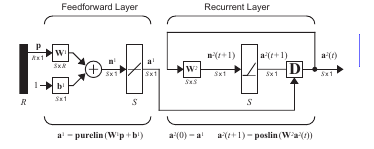

Figure.1 Hamming Network

## Structure of the Hamming Network

The Hamming network consists of two layers:

1. **Feedforward Layer**: This layer performs a correlation between the input vector and the prototype vectors.
2. **Recurrent Layer**: This layer performs a competition to determine which of the prototype vectors is closest to the input vector.

### Layer 1

Recall from Chapter 15 (see page 15-9 and following) that a single instar is able to recognize only one pattern. To allow multiple patterns to be classified, we need to have multiple instars. This is accomplished in the Hamming network.

Suppose that we want the network to recognize the following prototype vectors:

$$
\{ p_1, p_2, \ldots, p_Q \}
$$

The weight matrix $ W_1 $ and the bias vector $ b_1 $ for Layer 1 will be:

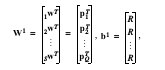

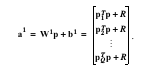

$$
W_1 = \begin{bmatrix}
w_1^T & p_1^T \\
w_2^T & p_2^T \\
\vdots & \vdots \\
w_Q^T & p_Q^T
\end{bmatrix}, \quad b_1 = R
$$

where each row of $ W_1 $ represents a prototype vector that we want to recognize, and each element of $ b_1 $ is set equal to the number of elements in each input vector $ R $. The number of neurons $ S $ is equal to the number of prototype vectors $ Q $ to be recognized.

Thus, the output of the first layer is given by:

$$
a = W_1 p + b_1 = 
\begin{bmatrix}
p_1^T p + R \\
p_2^T p + R \\
\vdots \\
p_Q^T p + R
\end{bmatrix}
$$

Note that the outputs of Layer 1 are equal to the inner products of the prototype vectors with the input, plus $ R $. As discussed in Chapter 3 (page 3-9), these inner products indicate how close each of the prototype patterns is to the input vector. This concept was also presented in our discussion of the instar on page 15-10.

## Layer 2 of the Hamming Network

In the instar of Chapter 15, a hardlim transfer function was used to decide if the input vector was close enough to the prototype vector. In Layer 2 of the Hamming network, we have multiple instars, and therefore we want to determine which prototype vector is closest to the input. Instead of the hardlim transfer function, we will use a competitive layer to choose the closest prototype.

## Competitive Layer

Layer 2 is a competitive layer. The neurons in this layer are initialized with the outputs of the feedforward layer, which indicate the correlation between the prototype patterns and the input vector. Then the neurons compete with each other to determine a winner. After the competition, only one neuron will have a nonzero output. The winning neuron indicates which category of input was presented to the network (each prototype vector represents a category).

1. The first-layer output $ a $ is used to initialize the second layer:

   $$
   a^{(0)} = a
   $$

2. The second-layer output is updated according to the following recurrence relation:



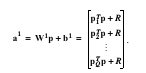


   $$
   a^{(t+1)} = \text{poslin}(W_2 a^{(t)})
   $$

### Weight Initialization

The second-layer weights $ W_2 $ are set so that the diagonal elements are 1, and the off-diagonal elements have a small negative value:

$$
w_{ij} = 
\begin{cases} 
1 & \text{if } i = j \\ 
-\epsilon & \text{otherwise} 
\end{cases}
$$

where $ 0 < \epsilon < 1 $. This matrix produces lateral inhibition, where the output of each neuron has an inhibitory effect on all of the other neurons.

### Single Neuron Update

To illustrate this effect, we substitute weight values of 1 and $-\epsilon$ for the appropriate elements of $ W_2 $, and rewrite the equation for a single neuron:


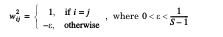

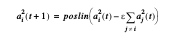

$$
a_i^{(t+1)} = \text{poslin}\left(a_i^{(t)} - \epsilon \sum_{j \neq i} a_j^{(t)}\right)
$$

At each iteration, each neuron's output will decrease in proportion to the sum of the other neurons' outputs (with a minimum output of 0). The output of the neuron with the largest initial condition will decrease more slowly than the outputs of the other neurons. Eventually, that neuron will be the only one with a positive output. At this point, the network has reached a steady state.

The index of the second-layer neuron with a stable positive output indicates the prototype vector that best matched the input. This phenomenon is known as **winner-take-all competition**, as only one neuron will have a nonzero output. In Chapter 18, we will discuss other types of competition.



In [1]:
import numpy as np

class HammingNetwork:
    def __init__(self, prototype_vectors):
        self.prototype_vectors = prototype_vectors
        self.num_prototypes = prototype_vectors.shape[0]
        self.input_dim = prototype_vectors.shape[1]
        
        # Initialize weights and biases
        self.W1 = np.array(prototype_vectors)  # Weight matrix for layer 1
        self.b1 = np.full((self.num_prototypes,), self.input_dim)  # Bias vector for layer 1
        self.W2 = np.eye(self.num_prototypes) - 0.1  # Weight matrix for layer 2 with small negative off-diagonals

    def feedforward(self, input_vector):
        # Layer 1 output
        a1 = np.dot(self.W1, input_vector) + self.b1
        # Apply activation function (linear in this case)
        a1 = np.maximum(a1, 0)  # Using ReLU activation
        
        # Initialize Layer 2 with Layer 1 output
        a2 = a1.copy()
        
        # Apply competitive layer
        for _ in range(10):  # Iterate for convergence
            a2_prev = a2.copy()
            a2 = np.maximum(a2_prev - 0.1 * (self.W2 @ a2_prev), 0)  # Update with inhibition
            if np.array_equal(a2, a2_prev):  # Check for convergence
                break
        
        # Determine the index of the winning neuron
        winner_index = np.argmax(a2)
        return winner_index, a1, a2

# Example usage
if __name__ == "__main__":
    # Define prototype vectors (3 prototypes with 4 dimensions)
    prototypes = np.array([[1, 0, 0, 0],
                           [0, 1, 0, 0],
                           [0, 0, 1, 0]])
    
    # Create Hamming network
    hamming_network = HammingNetwork(prototypes)

    # Input vector to classify
    input_vector = np.array([0.9, 0.1, 0.1, 0.0])
    
    # Perform feedforward process
    winner_index, layer1_output, layer2_output = hamming_network.feedforward(input_vector)
    
    print(f"Winning prototype index: {winner_index}")
    print(f"Layer 1 Output: {layer1_output}")
    print(f"Layer 2 Output: {layer2_output}")


Winning prototype index: 0
Layer 1 Output: [4.9 4.1 4.1]
Layer 2 Output: [2.29935124 2.02040849 2.02040849]


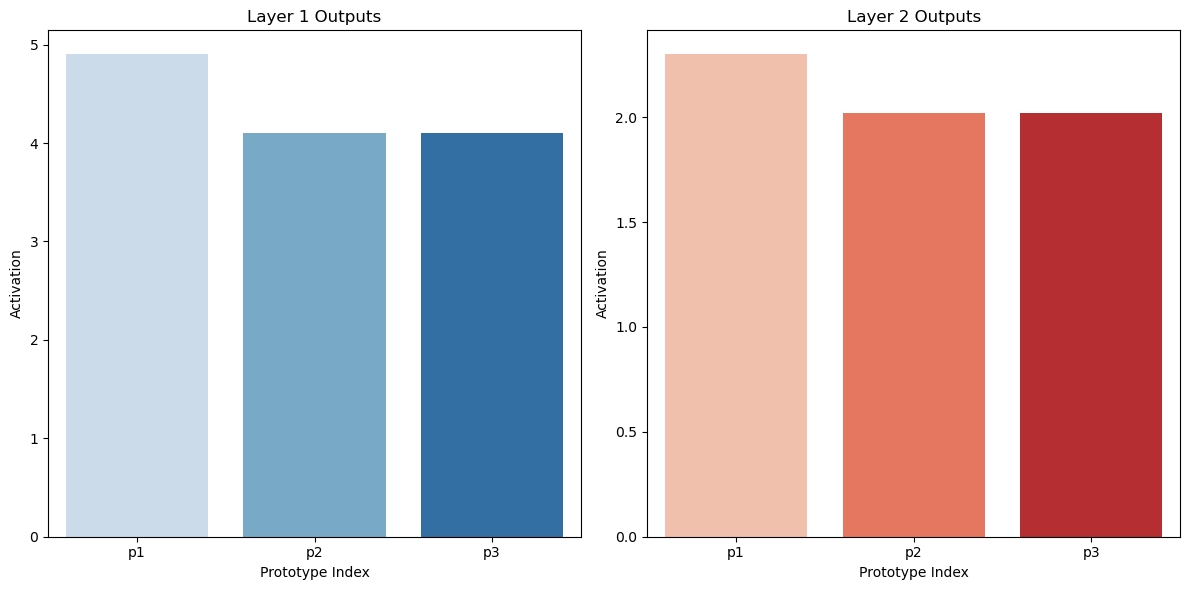

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

class HammingNetwork:
    def __init__(self, prototype_vectors):
        self.prototype_vectors = prototype_vectors
        self.num_prototypes = prototype_vectors.shape[0]
        self.input_dim = prototype_vectors.shape[1]
        
        # Initialize weights and biases
        self.W1 = np.array(prototype_vectors)  # Weight matrix for layer 1
        self.b1 = np.full((self.num_prototypes,), self.input_dim)  # Bias vector for layer 1
        self.W2 = np.eye(self.num_prototypes) - 0.1  # Weight matrix for layer 2 with small negative off-diagonals

    def feedforward(self, input_vector):
        # Layer 1 output
        a1 = np.dot(self.W1, input_vector) + self.b1
        # Apply activation function (ReLU)
        a1 = np.maximum(a1, 0)  # Using ReLU activation
        
        # Initialize Layer 2 with Layer 1 output
        a2 = a1.copy()
        
        # Apply competitive layer
        for _ in range(10):  # Iterate for convergence
            a2_prev = a2.copy()
            a2 = np.maximum(a2_prev - 0.1 * (self.W2 @ a2_prev), 0)  # Update with inhibition
            if np.array_equal(a2, a2_prev):  # Check for convergence
                break
        
        # Determine the index of the winning neuron
        winner_index = np.argmax(a2)
        return winner_index, a1, a2

    def plot_outputs(self, input_vector):
        winner_index, layer1_output, layer2_output = self.feedforward(input_vector)
        
        # Create a figure for the plots
        plt.figure(figsize=(12, 6))

        # Plot Layer 1 Outputs
        plt.subplot(1, 2, 1)
        sns.barplot(x=np.arange(self.num_prototypes), y=layer1_output, palette='Blues')
        plt.title('Layer 1 Outputs')
        plt.xlabel('Prototype Index')
        plt.ylabel('Activation')
        plt.xticks(ticks=np.arange(self.num_prototypes), labels=[f'p{i+1}' for i in range(self.num_prototypes)])

        # Plot Layer 2 Outputs
        plt.subplot(1, 2, 2)
        sns.barplot(x=np.arange(self.num_prototypes), y=layer2_output, palette='Reds')
        plt.title('Layer 2 Outputs')
        plt.xlabel('Prototype Index')
        plt.ylabel('Activation')
        plt.xticks(ticks=np.arange(self.num_prototypes), labels=[f'p{i+1}' for i in range(self.num_prototypes)])

        plt.tight_layout()
        plt.show()

# Example usage
if __name__ == "__main__":
    # Define prototype vectors (3 prototypes with 4 dimensions)
    prototypes = np.array([[1, 0, 0, 0],
                           [0, 1, 0, 0],
                           [0, 0, 1, 0]])
    
    # Create Hamming network
    hamming_network = HammingNetwork(prototypes)

    # Input vector to classify
    input_vector = np.array([0.9, 0.1, 0.1, 0.0])
    
    # Plot outputs for the given input vector
    hamming_network.plot_outputs(input_vector)


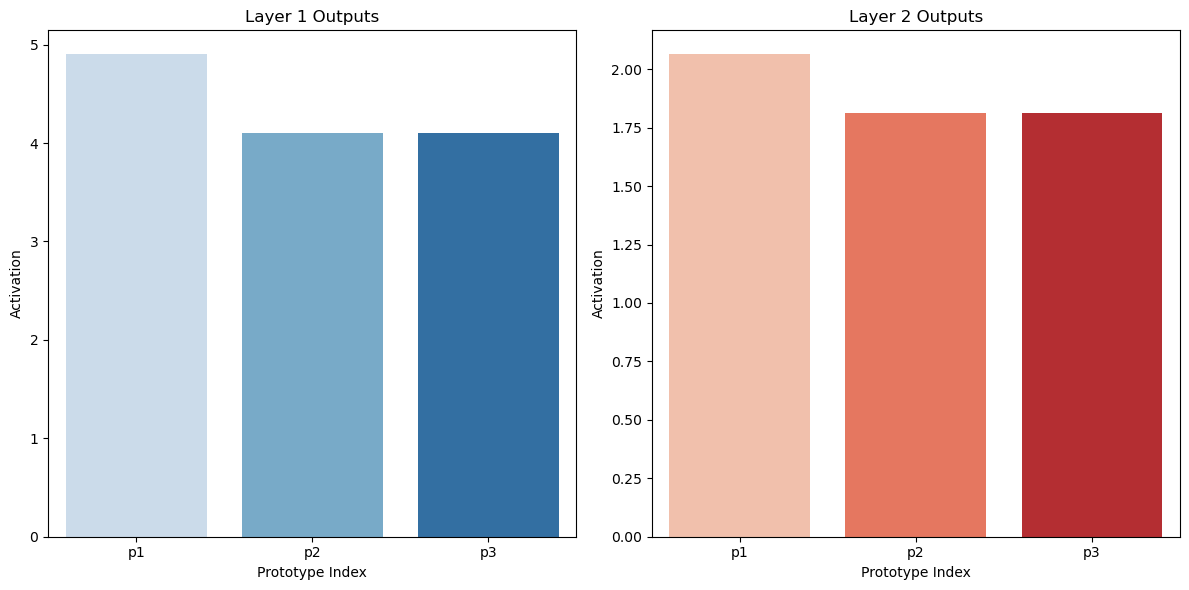

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

class HammingNetwork:
    def __init__(self, prototype_vectors):
        self.prototype_vectors = prototype_vectors
        self.num_prototypes = len(prototype_vectors)
        self.input_dim = len(prototype_vectors[0])
        
        # Initialize weights and biases
        self.W1 = prototype_vectors  # Weight matrix for layer 1
        self.b1 = [self.input_dim] * self.num_prototypes  # Bias vector for layer 1
        self.W2 = [[1 if i == j else -0.1 for j in range(self.num_prototypes)] for i in range(self.num_prototypes)]  # Weight matrix for layer 2

    def dot_product(self, vector_a, vector_b):
        return sum(a * b for a, b in zip(vector_a, vector_b))

    def relu(self, x):
        return max(0, x)

    def feedforward(self, input_vector):
        # Layer 1 output
        a1 = [self.relu(self.dot_product(self.W1[i], input_vector) + self.b1[i]) for i in range(self.num_prototypes)]
        
        # Initialize Layer 2 with Layer 1 output
        a2 = a1.copy()
        
        # Apply competitive layer
        for _ in range(10):  # Iterate for convergence
            a2_prev = a2.copy()
            for i in range(self.num_prototypes):
                # Update with inhibition
                a2[i] = self.relu(a2_prev[i] - 0.1 * sum(self.W2[i][j] * a2_prev[j] for j in range(self.num_prototypes)))
            if a2 == a2_prev:  # Check for convergence
                break
        
        # Determine the index of the winning neuron
        winner_index = a2.index(max(a2))
        return winner_index, a1, a2

    def plot_outputs(self, input_vector):
        winner_index, layer1_output, layer2_output = self.feedforward(input_vector)
        
        # Create a figure for the plots
        plt.figure(figsize=(12, 6))

        # Plot Layer 1 Outputs
        plt.subplot(1, 2, 1)
        sns.barplot(x=list(range(self.num_prototypes)), y=layer1_output, palette='Blues')
        plt.title('Layer 1 Outputs')
        plt.xlabel('Prototype Index')
        plt.ylabel('Activation')
        plt.xticks(ticks=list(range(self.num_prototypes)), labels=[f'p{i+1}' for i in range(self.num_prototypes)])

        # Plot Layer 2 Outputs
        plt.subplot(1, 2, 2)
        sns.barplot(x=list(range(self.num_prototypes)), y=layer2_output, palette='Reds')
        plt.title('Layer 2 Outputs')
        plt.xlabel('Prototype Index')
        plt.ylabel('Activation')
        plt.xticks(ticks=list(range(self.num_prototypes)), labels=[f'p{i+1}' for i in range(self.num_prototypes)])

        plt.tight_layout()
        plt.show()

# Example usage
if __name__ == "__main__":
    # Define prototype vectors (3 prototypes with 4 dimensions)
    prototypes = [[1, 0, 0, 0],
                  [0, 1, 0, 0],
                  [0, 0, 1, 0]]
    
    # Create Hamming network
    hamming_network = HammingNetwork(prototypes)

    # Input vector to classify
    input_vector = [0.9, 0.1, 0.1, 0.0]
    
    # Plot outputs for the given input vector
    hamming_network.plot_outputs(input_vector)


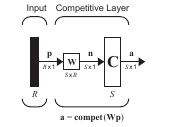

Figure.2 Competitive Layer

## Competitive Layer

The second-layer neurons in the Hamming network are said to be in competition because each neuron excites itself and inhibits all the other neurons. To simplify our discussions in the remainder of this chapter, we will define a transfer function that performs the function of a recurrent competitive layer:

$$
a = \text{compet}(n) \tag{16.8}
$$

This function works by finding the index $i^*$ of the neuron with the largest net input, and sets its output to 1 (with ties going to the neuron with the lowest index). The competitive output can be defined as:

$$
\begin{align*}
a_i = \begin{cases} 
1, & \text{if } i = i^* \\
0, & \text{if } i \neq i^*
\end{cases} 
\end{align*} \tag{16.9}
$$

where $n_{i^*} \geq n_i, \, \forall i$ and $i^* \leq i, \, \forall n_i = n_{i^*}$.

Replacing the recurrent layer of the Hamming network with a competitive transfer function on the first layer will simplify our presentations in this chapter. We will study the competition process in more detail in Chapter 18.

## Competitive Layer Structure

As with the Hamming network, the prototype vectors are stored in the rows of $W$. The net input \(n\) calculates the distance between the input vector $p$ and each prototype $w_i$ (assuming vectors have normalized lengths of $L$). The net input $n_i$ of each neuron $i$ is proportional to the angle $\theta_i$ between $p$ and the prototype vector $w_i$:

$$
n = Wp = \begin{bmatrix}
\frac{1}{L} w_1^T p \\
\vdots \\
\frac{1}{L} w_S^T p
\end{bmatrix} = \begin{bmatrix}
\frac{1}{L} \cos \theta_1 \\
\vdots \\
\frac{1}{L} \cos \theta_S
\end{bmatrix} \tag{16.10}
$$

The competitive transfer function assigns an output of 1 to the neuron whose weight vector points in the direction closest to the input vector:

$$
a = \text{compet}(Wp) \tag{16.11}
$$


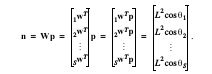

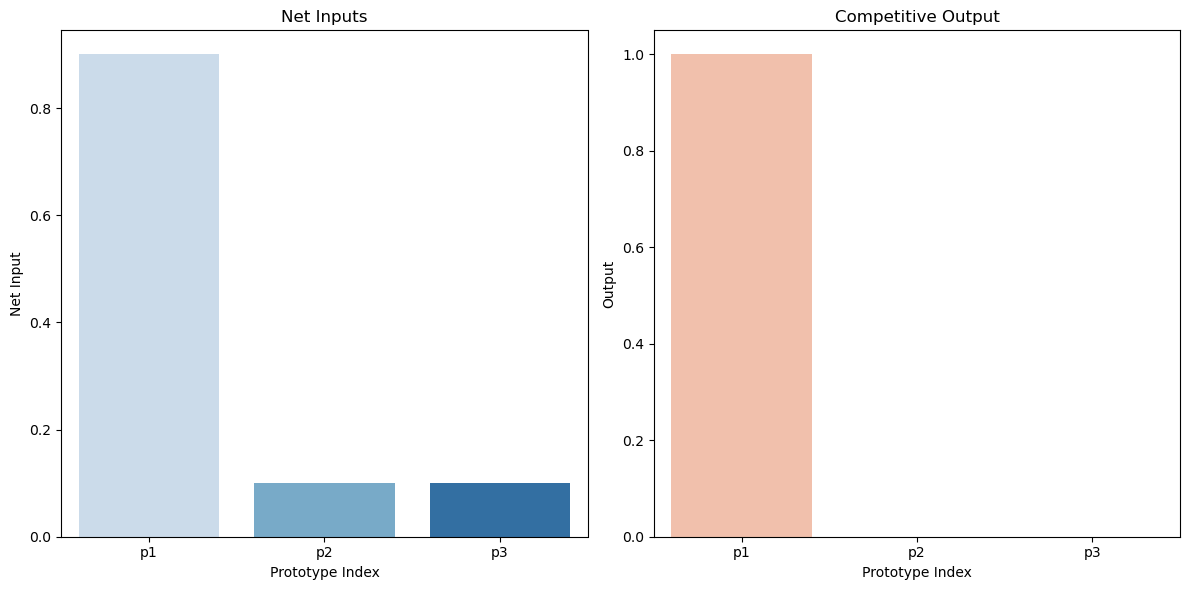

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

class CompetitiveLayer:
    def __init__(self, prototype_vectors):
        self.prototype_vectors = prototype_vectors
        self.num_prototypes = len(prototype_vectors)
        self.input_dim = len(prototype_vectors[0])

    def dot_product(self, vector_a, vector_b):
        return sum(a * b for a, b in zip(vector_a, vector_b))

    def calculate_net_inputs(self, input_vector):
        # Calculate net inputs for each prototype vector
        net_inputs = [self.dot_product(w, input_vector) for w in self.prototype_vectors]
        return net_inputs

    def compet(self, net_inputs):
        # Competitive transfer function
        max_input = max(net_inputs)
        return [1 if net_input == max_input else 0 for net_input in net_inputs]

    def feedforward(self, input_vector):
        # Calculate net inputs
        net_inputs = self.calculate_net_inputs(input_vector)
        # Get competitive output
        output = self.compet(net_inputs)
        return net_inputs, output

    def plot_outputs(self, input_vector):
        net_inputs, output = self.feedforward(input_vector)

        # Create a figure for the plots
        plt.figure(figsize=(12, 6))

        # Plot net inputs
        plt.subplot(1, 2, 1)
        sns.barplot(x=list(range(self.num_prototypes)), y=net_inputs, palette='Blues')
        plt.title('Net Inputs')
        plt.xlabel('Prototype Index')
        plt.ylabel('Net Input')
        plt.xticks(ticks=list(range(self.num_prototypes)), labels=[f'p{i+1}' for i in range(self.num_prototypes)])

        # Plot outputs
        plt.subplot(1, 2, 2)
        sns.barplot(x=list(range(self.num_prototypes)), y=output, palette='Reds')
        plt.title('Competitive Output')
        plt.xlabel('Prototype Index')
        plt.ylabel('Output')
        plt.xticks(ticks=list(range(self.num_prototypes)), labels=[f'p{i+1}' for i in range(self.num_prototypes)])

        plt.tight_layout()
        plt.show()

# Example usage
if __name__ == "__main__":
    # Define prototype vectors (3 prototypes with 4 dimensions)
    prototypes = [[1, 0, 0, 0],
                  [0, 1, 0, 0],
                  [0, 0, 1, 0]]
    
    # Create Competitive Layer
    competitive_layer = CompetitiveLayer(prototypes)

    # Input vector to classify
    input_vector = [0.9, 0.1, 0.1, 0.0]
    
    # Plot outputs for the given input vector
    competitive_layer.plot_outputs(input_vector)


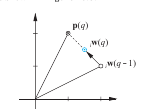

Figure.3 Graphical Representation of the Kohonen Rule

# Competitive Learning

We can design a competitive network classifier by setting the rows of \( W \) to the desired prototype vectors. However, we would like to have a learning rule that could be used to train the weights in a competitive network, without knowing the prototype vectors. 

One such learning rule is the **instar rule** from Chapter 15:

$$
\mathbf{w}_i(q) = \mathbf{w}_i(q - 1) + \alpha a_i(q) \left( \mathbf{p}(q) - \mathbf{w}_i(q - 1) \right).
$$

For the competitive network, \( a \) is only nonzero for the winning neuron \((i = i^*)\). Therefore, we can express this using the **Kohonen rule**:

$$
\mathbf{w}_i(q) = \mathbf{w}_i(q - 1) + \alpha \left( \mathbf{p}(q) - \mathbf{w}_i(q - 1) \right),
$$

$$
\mathbf{w}_i(q) = \mathbf{w}_i(q - 1), \quad \text{for } i \neq i^*.
$$

Thus, the row of the weight matrix that is closest to the input vector (or has the largest inner product with the input vector) moves toward the input vector. It moves along a line between the old row of the weight matrix and the input vector, as shown in Figure 16.3.

$$
\begin{array}{cc}
\mathbf{p}(q) & \mathbf{w}_i(q) \\
\mathbf{w}_i(q - 1) & 
\end{array}
$$

## Sample Input Vectors

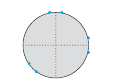

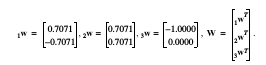

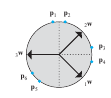

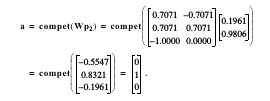

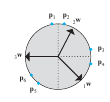



Let’s use the six vectors shown in Figure.4 to demonstrate how a competitive layer learns to classify vectors. Here are the six vectors:

$$
\begin{align*}
\mathbf{p}_1 &= -0.1961, \\
\mathbf{p}_2 &= 0.1961, \\
\mathbf{p}_3 &= 0.9806, \\
\mathbf{p}_4 &= 0.9806, \\
\mathbf{p}_5 &= -0.5812, \\
\mathbf{p}_6 &= -0.8137.
\end{align*}
$$

Our competitive network will have three neurons, and therefore it can classify vectors into three classes. Here are the "randomly" chosen normalized initial weights:

$$
\mathbf{W} = 
\begin{bmatrix}
0.7071 & 0.7071 & -1.0000 \\
-0.7071 & 0.7071 & 0.0000 \\
\end{bmatrix}.
$$

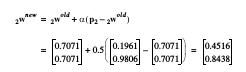

### Presenting the Input Vector

Let’s present the vector $ \mathbf{p}_2 $ to the network:

$$
\begin{pmatrix}
\mathbf{w}_1 \\
\mathbf{w}_2 \\
\mathbf{w}_3
\end{pmatrix}
\mathbf{a} = \text{compet}(W\mathbf{p}_2) = \text{compet}\left(
\begin{pmatrix}
0.7071 & -0.7071 \\
0.7071 & 0.1961 \\
0.9806 \\
-1.0000 & 0.0000
\end{pmatrix}
\right)
$$

$$
\begin{pmatrix}
-0.5547 \\
0 \\
0.8321 \\
\end{pmatrix} = \text{compet}(p_2) = 1.
$$

The second neuron’s weight vector was closest to $ \mathbf{p}_2 $, so it won the competition $(i^* = 2)$ and output $ a_2 = 1 $. 

### Applying the Kohonen Learning Rule

Now we apply the **Kohonen learning rule** to the winning neuron with a learning rate of $ \alpha = 0.5 $:

$$
\mathbf{w}_2^{\text{new}} = \mathbf{w}_2^{\text{old}} + \alpha \left( \mathbf{p}_2 - \mathbf{w}_2^{\text{old}} \right).
$$

Calculating this gives:

$$
\begin{pmatrix}
0.7071 \\
0.7071
\end{pmatrix} + 0.5 \left(
\begin{pmatrix}
0.1961 \\
0.7071
\end{pmatrix} - 
\begin{pmatrix}
0.7071 \\
0.7071
\end{pmatrix}
\right) = 
\begin{pmatrix}
0.4516 \\
0.8438
\end{pmatrix}.
$$

If we continue choosing input vectors at random and presenting them to the network, at each iteration, the weight vector closest to the input vector will move toward that vector. Eventually, each weight vector will point at a different cluster of input vectors, becoming a prototype for a different cluster.

### Final Weights

The final weights will look something like those shown in Figure 16.5:

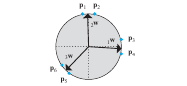

$$
\begin{array}{cccc}
\mathbf{p}_1 & \mathbf{p}_2 & \mathbf{w}_2 & \mathbf{p}_3 \\
\mathbf{w}_1 & \mathbf{p}_4 & \mathbf{w}_3 & \mathbf{p}_6 \\
\mathbf{p}_5 &
\end{array}
$$

Once the network has learned to cluster the input vectors, it will classify new vectors accordingly. The competitive layer assigns each input vector $ \mathbf{p} $ to one of these classes by producing an output of 1 for the neuron whose weight vector is closest to $ \mathbf{p} $.

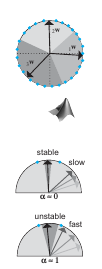



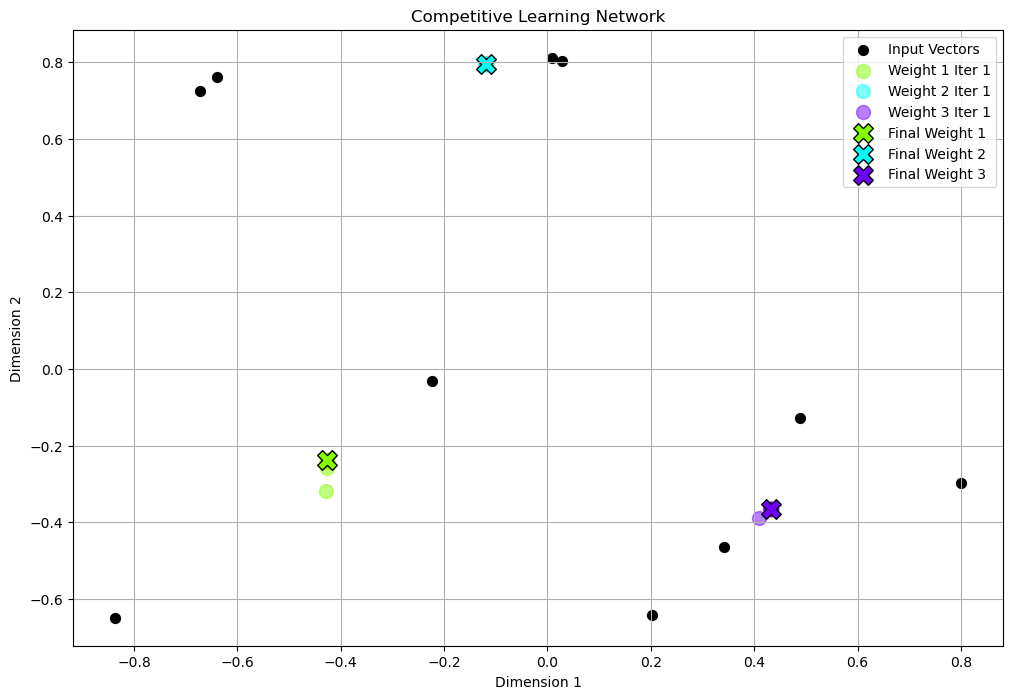

In [5]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Function to calculate the distance between two vectors
def calculate_distance(vec1, vec2):
    return sum((x - y) ** 2 for x, y in zip(vec1, vec2)) ** 0.5

# Function to find the winning neuron
def find_winner(weights, input_vector):
    distances = [calculate_distance(weight, input_vector) for weight in weights]
    return distances.index(min(distances))

# Function to update weights based on the Kohonen learning rule
def update_weights(weights, input_vector, winner_index, alpha):
    for i in range(len(weights)):
        if i == winner_index:
            weights[i] = [w + alpha * (p - w) for w, p in zip(weights[i], input_vector)]
        else:
            weights[i] = weights[i]  # No change for non-winner

# Main function to run the competitive learning network
def competitive_learning(input_vectors, num_neurons, alpha, num_iterations):
    # Random initialization of weights
    weights = [[random.uniform(-1, 1) for _ in range(len(input_vectors[0]))] for _ in range(num_neurons)]
    
    # Store weight updates for plotting
    weight_history = []

    for _ in range(num_iterations):
        for input_vector in input_vectors:
            winner_index = find_winner(weights, input_vector)
            update_weights(weights, input_vector, winner_index, alpha)
        weight_history.append([list(w) for w in weights])  # Store a copy of the weights

    return weights, weight_history

# Generate random input vectors
num_vectors = 10
input_vectors = [[random.uniform(-1, 1) for _ in range(2)] for _ in range(num_vectors)]

# Set parameters
num_neurons = 3
alpha = 0.5
num_iterations = 10

# Run competitive learning
final_weights, weight_history = competitive_learning(input_vectors, num_neurons, alpha, num_iterations)

# Plotting
plt.figure(figsize=(12, 8))
colors = sns.color_palette("hsv", num_neurons)

# Plot the input vectors
for vector in input_vectors:
    plt.scatter(vector[0], vector[1], color='black', s=50, label='Input Vectors' if 'Input Vectors' not in plt.gca().get_legend_handles_labels()[1] else "")

# Plot weight updates at each iteration
for iteration, weights in enumerate(weight_history):
    for i, weight in enumerate(weights):
        plt.scatter(weight[0], weight[1], color=colors[i], s=100, alpha=0.5, label=f'Weight {i+1} Iter {iteration+1}' if iteration == 0 else "")

# Final weights
for i, weight in enumerate(final_weights):
    plt.scatter(weight[0], weight[1], color=colors[i], s=200, edgecolor='black', marker='X', label=f'Final Weight {i+1}')

plt.title("Competitive Learning Network")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.grid()
plt.legend()
plt.show()




## Problems with Competitive Layers

Competitive layers make efficient adaptive classifiers, but they do suffer from a few problems. 

1. **Trade-off Between Learning Rate and Stability**  
   The first problem is that the choice of learning rate forces a trade-off between the speed of learning and the stability of the final weight vectors. A learning rate near zero results in slow learning. However, once a weight vector reaches the center of a cluster, it will tend to stay close to the center. In contrast, a learning rate near 1.0 results in fast learning. However, once the weight vector has reached a cluster, it will continue to oscillate as different vectors in the cluster are presented. 

   Sometimes, this trade-off between fast learning and stability can be used to advantage. Initial training can be done with a large learning rate for fast learning. Then the learning rate can be decreased as training progresses to achieve stable prototype vectors. Unfortunately, this technique will not work if the network needs to continuously adapt to new arrangements of input vectors.

2. **Stability Problems with Close Clusters**  
   A more serious stability problem occurs when clusters are close together. In certain cases, a weight vector forming a prototype of one cluster may "invade" the territory of another weight vector, thus upsetting the current classification scheme. The series of four diagrams in Figure 16.6 illustrate this problem.

   **Figure 16.6: Example of Unstable Learning**
   - Two input vectors (shown with blue circles in diagram (a)) are presented several times. 
   - The result is that the weight vectors representing the middle and right clusters shift to the right. 
   - Eventually, one of the right cluster vectors is reclassified by the center weight vector. 
   - Further presentations move the middle vector over to the right until it "loses" some of its vectors, which then become part of the class associated with the left weight vector.
   
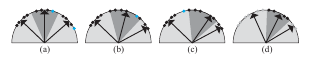

Figure.6 Example of Unstable Learning

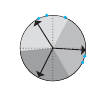

3. **Dead Neurons**  
   A third problem with competitive learning is that occasionally a neuron's initial weight vector is located so far from any input vectors that it never wins the competition, and therefore never learns. The result is a "dead" neuron, which does nothing useful. For example, a weight vector that points downwards may never learn, regardless of the order in which vectors are presented.

   One solution to this problem consists of adding a negative bias to the net input of each neuron and then decreasing the bias each time the neuron wins. This will make it harder for a neuron to win the competition if it has won often. This mechanism is sometimes called a "conscience."

4. **Class Limitations**  
   Finally, a competitive layer always has as many classes as it has neurons. This may not be acceptable for some applications, especially when the number of clusters is not known in advance. 

   In addition, for competitive layers, each class consists of a convex region of the input space. Competitive layers cannot form classes with nonconvex regions or classes that are the union of unconnected regions.

Some of the problems discussed in this section are solved by the feature map and LVQ networks, which are introduced in later sections of this chapter, and the ART networks, which are presented in Chapter 19.


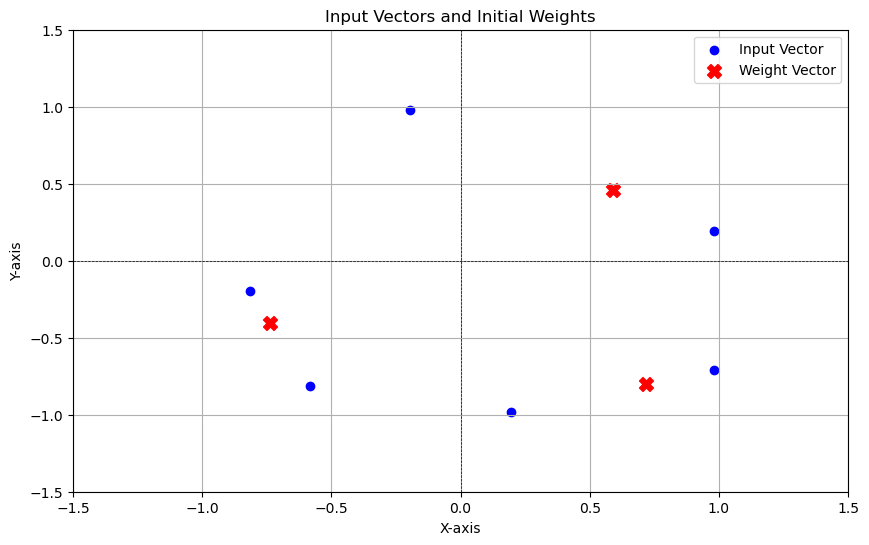

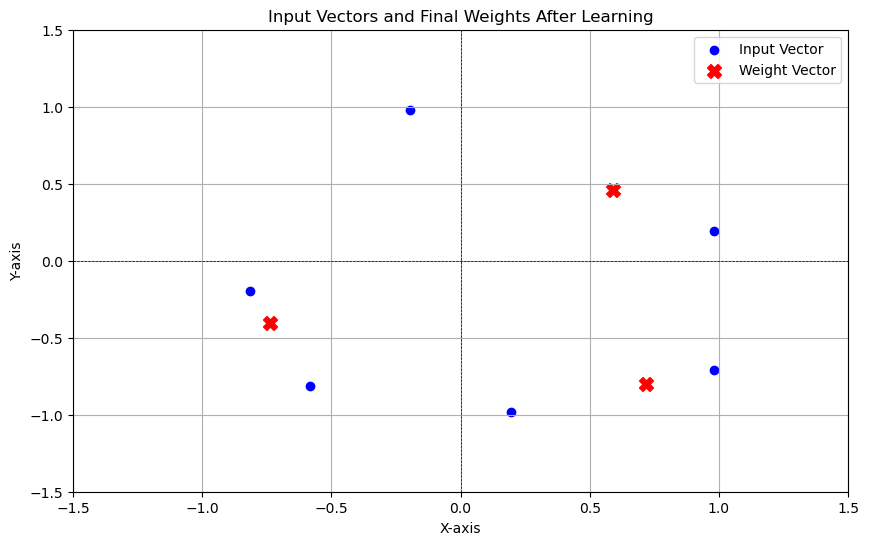

In [6]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Set random seed for reproducibility
random.seed(42)

# Define input vectors (normalized)
input_vectors = [
    [0.1961, -0.9806],
    [-0.1961, 0.9806],
    [0.9806, 0.1961],
    [-0.5812, -0.8137],
    [-0.8137, -0.1961],
    [0.9806, -0.7071]
]

# Initial weight vectors (randomly chosen and normalized)
weights = [
    [0.7071, -0.7071],
    [0.7071, 0.7071],
    [-1.0000, 0.0000]
]

# Learning rate
alpha = 0.5

# Function to calculate the Euclidean distance
def euclidean_distance(v1, v2):
    return sum((a - b) ** 2 for a, b in zip(v1, v2)) ** 0.5

# Competitive Learning Algorithm
def competitive_learning(input_vectors, weights, alpha, iterations):
    for _ in range(iterations):
        for input_vector in input_vectors:
            # Calculate the distance from input vector to each weight vector
            distances = [euclidean_distance(input_vector, weight) for weight in weights]
            # Find the index of the winning neuron (closest weight vector)
            winner_index = distances.index(min(distances))

            # Update the winning weight vector
            for i in range(len(weights[winner_index])):
                weights[winner_index][i] += alpha * (input_vector[i] - weights[winner_index][i])

    return weights

# Run the competitive learning algorithm
final_weights = competitive_learning(input_vectors, weights, alpha, iterations=20)

# Plotting the input vectors and the final weight vectors
def plot_vectors(input_vectors, weights, title):
    plt.figure(figsize=(10, 6))
    # Plot input vectors
    for vector in input_vectors:
        plt.scatter(vector[0], vector[1], color='blue', label='Input Vector' if vector == input_vectors[0] else "")
    
    # Plot weight vectors
    for weight in weights:
        plt.scatter(weight[0], weight[1], color='red', marker='X', s=100, label='Weight Vector' if weight == weights[0] else "")
    
    plt.xlim(-1.5, 1.5)
    plt.ylim(-1.5, 1.5)
    plt.axhline(0, color='black', lw=0.5, ls='--')
    plt.axvline(0, color='black', lw=0.5, ls='--')
    plt.title(title)
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.grid()
    plt.legend()
    plt.show()

# Plot before and after learning
plot_vectors(input_vectors, weights, "Input Vectors and Initial Weights")
plot_vectors(input_vectors, final_weights, "Input Vectors and Final Weights After Learning")


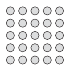

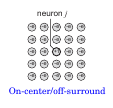



### Competitive Layers in Biology

In previous chapters, we have made no mention of how neurons are physically organized within a layer (the topology of the network). In biological neural networks, neurons are typically arranged in two-dimensional layers, in which they are densely interconnected through lateral feedback. 

The diagram to the left shows a layer of twenty-five neurons arranged in a two-dimensional grid. Often, weights vary as a function of the distance between the neurons they connect. For example, the weights for Layer 2 of the Hamming network are assigned as follows:

$$
w_{ij} =
\begin{cases}
1, & \text{if } i = j \\
-\epsilon, & \text{if } i \neq j
\end{cases}
$$

Eq. (16.20) assigns the same values as Eq. (16.19), but in terms of the distances $d_{ij}$ between neurons:

$$
w_{ij} =
\begin{cases}
1, & \text{if } d_{ij} = 0 \\
-\epsilon, & \text{if } d_{ij} > 0
\end{cases}
$$

Either Eq. (16.19) or Eq. (16.20) will assign the weight values shown in the diagram at left. Each neuron $i$ is labeled with the value of the weight $w_{ij}$, which comes from it to the neuron marked $j$.

The term **on-center/off-surround** is often used to describe such a connection pattern between neurons. Each neuron reinforces itself (center), while inhibiting all other neurons (surround). 

It turns out that this is a crude approximation of biological competitive layers. In biology, a neuron reinforces not only itself, but also those neurons close to it. Typically, the transition from reinforcement to inhibition occurs smoothly as the distance between neurons increases. 

This transition is illustrated on the left side of Figure 16.7. This is a function that relates the distance between neurons to the weight connecting them. Those neurons that are close provide excitatory (reinforcing) connections, and the magnitude of the excitation decreases as the distance increases. Beyond a certain distance, the neurons begin to have inhibitory connections, and the inhibition increases as the distance increases. Because of its shape, the function is referred to as the **Mexican-hat function**.

On the right side of Figure.7 is a two-dimensional illustration of the Mexican-hat (on-center/off-surround) function. Each neuron $i$ is marked to show the sign and relative strength of its weight $w_{ij}$ going to neuron $j$.

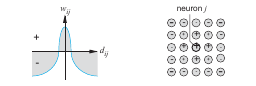

Figure.7 On-Center/Off-Surround Layer in Biology

Biological competitive systems, in addition to having a gradual transition between excitatory and inhibitory regions of the on-center/off-surround connection pattern, also have a weaker form of competition than the winner-take-all competition of the Hamming network. Instead of a single active neuron (winner), biological networks generally have "bubbles" of activity that are centered around the most active neuron. This is caused in part by the form of the on-center/off-surround connectivity pattern and also by nonlinear feedback connections.


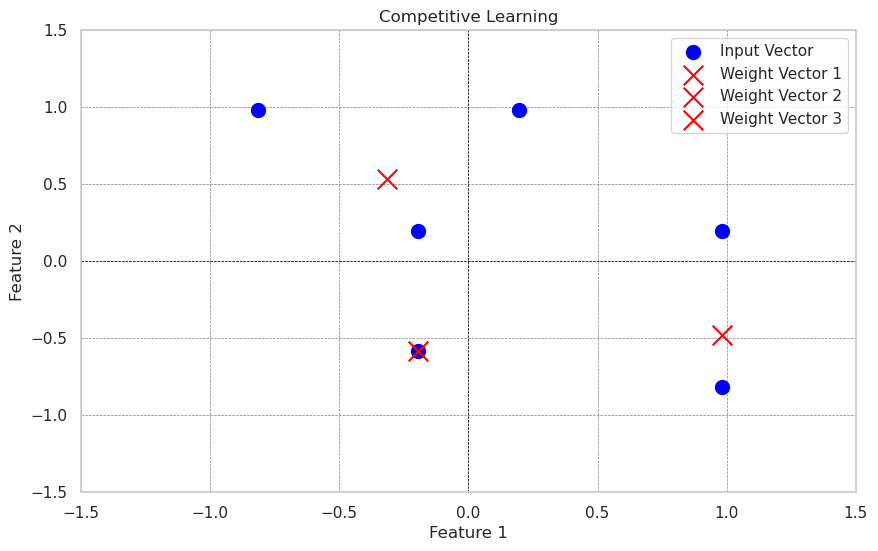

In [7]:
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# Define parameters
num_neurons = 3  # Number of neurons (classes)
num_iterations = 50  # Number of iterations for training
learning_rate = 0.5  # Learning rate
input_vectors = [
    [-0.1961, -0.5812], 
    [0.1961, 0.9806], 
    [0.9806, 0.1961], 
    [0.9806, -0.8137], 
    [-0.8137, 0.9806], 
    [-0.1961, 0.1961]
]  # Sample input vectors

# Initialize weights randomly
weights = [[random.uniform(-1, 1) for _ in range(2)] for _ in range(num_neurons)]

# Function to find the index of the winning neuron
def compet(input_vector, weights):
    max_index = 0
    max_value = -float('inf')
    
    for i in range(len(weights)):
        # Calculate dot product
        dot_product = sum(w * x for w, x in zip(weights[i], input_vector))
        if dot_product > max_value:
            max_value = dot_product
            max_index = i
            
    return max_index

# Function to update the weights of the winning neuron
def update_weights(weights, input_vector, winner_index):
    for i in range(len(weights[winner_index])):
        weights[winner_index][i] += learning_rate * (input_vector[i] - weights[winner_index][i])

# Training the competitive layer
for iteration in range(num_iterations):
    for vector in input_vectors:
        winner_index = compet(vector, weights)
        update_weights(weights, vector, winner_index)

# Plotting the input vectors and the final weights
plt.figure(figsize=(10, 6))
for vector in input_vectors:
    plt.scatter(vector[0], vector[1], color='blue', s=100, label='Input Vector' if vector == input_vectors[0] else "")
    
for i, weight in enumerate(weights):
    plt.scatter(weight[0], weight[1], color='red', s=200, marker='x', label=f'Weight Vector {i+1}')

# Add labels and legend
plt.title('Competitive Learning')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.axhline(0, color='black',linewidth=0.5, ls='--')
plt.axvline(0, color='black',linewidth=0.5, ls='--')
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.show()


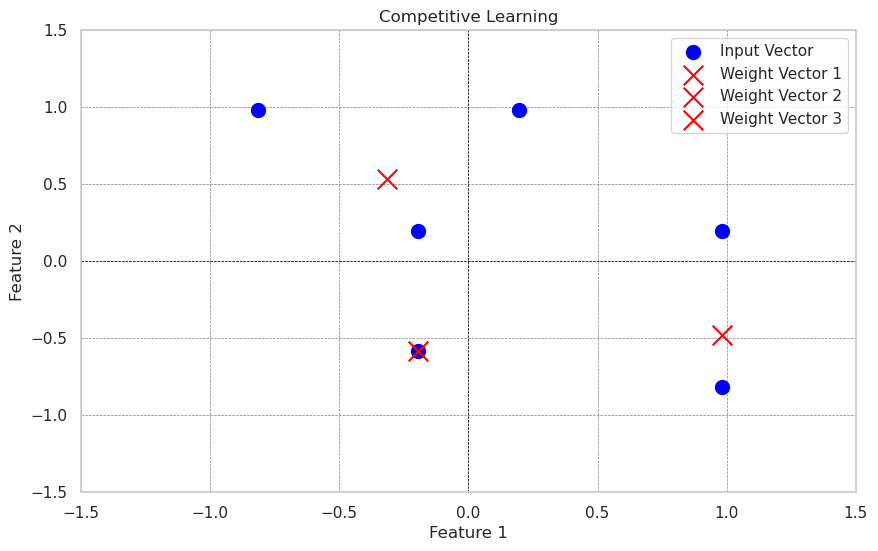

In [8]:
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# Define parameters
num_neurons = 3  # Number of neurons (classes)
num_iterations = 50  # Number of iterations for training
learning_rate = 0.5  # Learning rate
input_vectors = [
    [-0.1961, -0.5812], 
    [0.1961, 0.9806], 
    [0.9806, 0.1961], 
    [0.9806, -0.8137], 
    [-0.8137, 0.9806], 
    [-0.1961, 0.1961]
]  # Sample input vectors

# Initialize weights randomly
weights = [[random.uniform(-1, 1) for _ in range(2)] for _ in range(num_neurons)]

# Function to find the index of the winning neuron
def compet(input_vector, weights):
    max_index = 0
    max_value = -float('inf')
    
    for i in range(len(weights)):
        # Calculate dot product
        dot_product = sum(w * x for w, x in zip(weights[i], input_vector))
        if dot_product > max_value:
            max_value = dot_product
            max_index = i
            
    return max_index

# Function to update the weights of the winning neuron
def update_weights(weights, input_vector, winner_index):
    for i in range(len(weights[winner_index])):
        weights[winner_index][i] += learning_rate * (input_vector[i] - weights[winner_index][i])

# Training the competitive layer
for iteration in range(num_iterations):
    for vector in input_vectors:
        winner_index = compet(vector, weights)
        update_weights(weights, vector, winner_index)

# Plotting the input vectors and the final weights
plt.figure(figsize=(10, 6))
for vector in input_vectors:
    plt.scatter(vector[0], vector[1], color='blue', s=100, label='Input Vector' if vector == input_vectors[0] else "")
    
for i, weight in enumerate(weights):
    plt.scatter(weight[0], weight[1], color='red', s=200, marker='x', label=f'Weight Vector {i+1}')

# Add labels and legend
plt.title('Competitive Learning')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.axhline(0, color='black',linewidth=0.5, ls='--')
plt.axvline(0, color='black',linewidth=0.5, ls='--')
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.show()




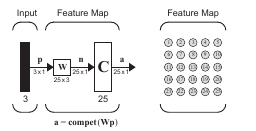

Figure.9 Self-Organizing Feature Map


## Self-Organizing Feature Maps

In order to emulate the activity bubbles of biological systems without having to implement the nonlinear on-center/off-surround feedback connections, Kohonen designed the following simplification. His self-organizing feature map (SOFM) network first determines the winning neuron $i^*$ using the same procedure as the competitive layer.

Next, the weight vectors for all neurons within a certain neighborhood of the winning neuron are updated using the Kohonen rule:

$$
w_i(q) = 
\begin{cases} 
w_i(q-1) + \alpha \left( p(q) - w_i(q-1) \right) & \text{for } i \in N_{i^*}(d) \\
(1 - \alpha) w_i(q-1) + \alpha p(q) & \text{otherwise}
\end{cases}
$$

where the neighborhood \(N_{i^*}(d)\) contains the indices for all of the neurons that lie within a radius \(d\) of the winning neuron \(i^*\):

$$
N_i(d) = \{ j \mid d_{ij} \leq d \}
$$

When a vector $p$ is presented, the weights of the winning neuron and its neighbors will move toward $p$. The result is that, after many presentations, neighboring neurons will have learned vectors similar to each other.

To demonstrate the concept of a neighborhood, consider the two diagrams below. The left diagram illustrates a two-dimensional neighborhood of radius $d = 1$ around neuron 13. The right diagram shows a neighborhood of radius $d = 2$:

$$
N_{13}(1) = \{ 8, 12, 13, 14, 18 \}
$$

$$
N_{13}(2) = \{ 3, 7, 8, 9, 11, 12, 13, 14, 15, 17, 18, 19, 23 \}
$$

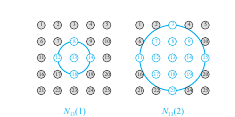

Figure.8 Neighborhoods

We should mention that the neurons in an SOFM do not have to be arranged in a two-dimensional pattern. It is possible to use a one-dimensional arrangement, or even three or more dimensions. For a one-dimensional SOFM, a neuron will only have two neighbors within a radius of 1 (or a single neighbor if the neuron is at the end of the line).

It is also possible to define distance in different ways. For instance, Kohonen has suggested rectangular and hexagonal neighborhoods for efficient implementation. The performance of the network is not sensitive to the exact shape of the neighborhoods.

Now let’s demonstrate the performance of an SOFM network. The diagram below shows a feature map and the two-dimensional topology of its neurons:

$$
\text{Input Feature Map} \quad
\text{Feature Map}
$$

$$
W = 
\begin{pmatrix}
w_{1,1} & w_{1,2} & w_{1,3} \\
\vdots & \vdots & \vdots \\
w_{25,1} & w_{25,2} & w_{25,3}
\end{pmatrix}
$$

where the initial weight vectors for the feature map are represented by dots on the sphere. (The weights are normalized; therefore, they will fall on the surface of a sphere.) Dots of neighboring neurons are connected by lines to visualize how the physical topology of the network is arranged in the input space.

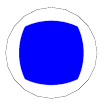




## Self-Organizing Feature Maps

The diagram to the left shows a square region on the surface of the sphere. We will randomly pick vectors in this region and present them to the feature map. Each time a vector is presented, the neuron with the closest weight vector will win the competition. The winning neuron and its neighbors move their weight vectors closer to the input vector (and therefore to each other). For this example, we are using a neighborhood with a radius of $1$.

The weight vectors have two tendencies:
1. They spread out over the input space as more vectors are presented.
2. They move toward the weight vectors of neighboring neurons.

These two tendencies work together to rearrange the neurons in the layer so that they evenly classify the input space. The series of diagrams in Figure 16.10 shows how the weights of the twenty-five neurons spread out over the active input space and organize themselves to match its topology.

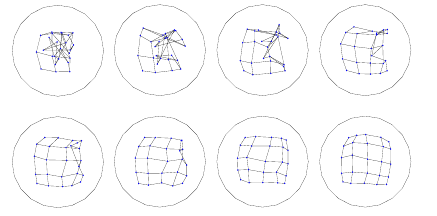


In this example, the input vectors were generated with equal probability from any point in the input space. Therefore, the neurons classify roughly equal areas of the input space. Figure.11 provides more examples of input regions and the resulting feature maps after self-organization.

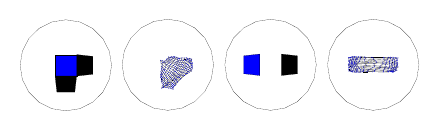

Figure.11 Other Examples of Feature Map Training

Occasionally, feature maps can fail to properly fit the topology of their input space. This usually occurs when two parts of the network fit the topology of separate parts of the input space, but the network forms a twist between them. An example is given in Figure.12.

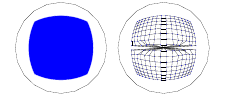

Figure.12 Feature Map with a Twist

It is unlikely that this twist will ever be removed because the two ends of the network have formed stable classifications of different regions.

## Improving Feature Maps

So far, we have described only the most basic algorithm for training feature maps. Now let's consider several techniques that can be used to speed up the self-organizing process and to make it more reliable.

1. **Varying Neighborhood Size**: Initially, the neighborhood size $d$ is set large. As training progresses, $d$ is gradually reduced until it only includes the winning neuron. This speeds up self-organization and makes twists in the map very unlikely.

2. **Varying Learning Rate**: An initial learning rate of $1$ allows neurons to quickly learn presented vectors. During training, the learning rate is decreased asymptotically toward $0$, so that learning becomes stable.

3. **Different Learning Rates for Neurons**: The winning neuron can use a larger learning rate than the neighboring neurons.

4. **Alternative Net Input Expression**: Instead of using the inner product, they can directly compute the distance between the input vector and the prototype vectors. The advantage of using the distance is that input vectors do not need to be normalized.

Other enhancements to the SOFM are described in Chapter 26, including a batch version of the SOFM learning rule. That chapter is a case study of using the SOFM for clustering.





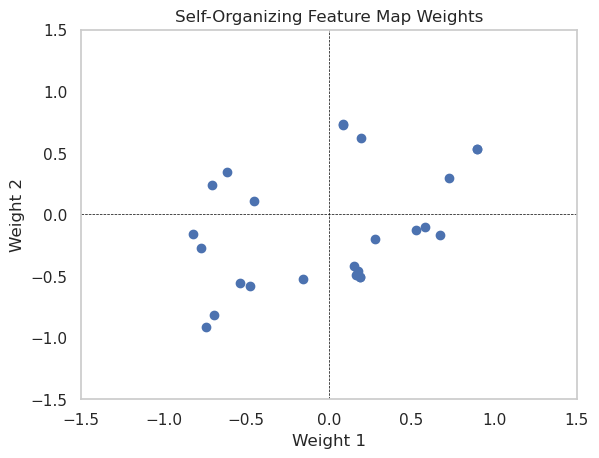

In [9]:
import random
import matplotlib.pyplot as plt
import numpy as np

# Function to initialize weights for the SOFM
def initialize_weights(num_neurons, num_features):
    weights = []
    for _ in range(num_neurons):
        # Randomly initialize weights in the range [-1, 1]
        weights.append([random.uniform(-1, 1) for _ in range(num_features)])
    return weights

# Function to compute the Euclidean distance between two vectors
def euclidean_distance(a, b):
    return np.sqrt(sum((x - y) ** 2 for x, y in zip(a, b)))

# Function to find the winning neuron
def find_winner(input_vector, weights):
    distances = [euclidean_distance(input_vector, weight) for weight in weights]
    return distances.index(min(distances))

# Function to update weights using the Kohonen rule
def update_weights(weights, input_vector, winner_index, neighborhood_radius, learning_rate):
    for i, weight in enumerate(weights):
        distance = abs(i - winner_index)
        if distance <= neighborhood_radius:
            # Update weights for the winner and its neighbors
            weights[i] = [w + learning_rate * (x - w) for w, x in zip(weight, input_vector)]
    return weights

# Function to train the SOFM
def train_sofm(num_neurons, num_features, num_iterations):
    weights = initialize_weights(num_neurons, num_features)
    neighborhood_radius = num_neurons // 2  # Initial neighborhood size
    learning_rate = 1.0  # Initial learning rate

    for iteration in range(num_iterations):
        input_vector = [random.uniform(-1, 1) for _ in range(num_features)]
        winner_index = find_winner(input_vector, weights)
        weights = update_weights(weights, input_vector, winner_index, neighborhood_radius, learning_rate)

        # Decrease neighborhood size and learning rate over time
        neighborhood_radius = max(1, neighborhood_radius - 1)  # Ensure it doesn't go below 1
        learning_rate = learning_rate * (1 - iteration / num_iterations)  # Decrease learning rate

    return weights

# Function to visualize the weights in a 2D plot
def visualize_weights(weights):
    weights = np.array(weights)
    plt.scatter(weights[:, 0], weights[:, 1], marker='o')
    plt.xlim(-1.5, 1.5)
    plt.ylim(-1.5, 1.5)
    plt.title('Self-Organizing Feature Map Weights')
    plt.xlabel('Weight 1')
    plt.ylabel('Weight 2')
    plt.grid()
    plt.axhline(0, color='black', lw=0.5, ls='--')
    plt.axvline(0, color='black', lw=0.5, ls='--')
    plt.show()

# Parameters
num_neurons = 25  # Number of neurons (5x5 grid)
num_features = 2  # Number of features
num_iterations = 250  # Number of training iterations

# Train the SOFM
weights = train_sofm(num_neurons, num_features, num_iterations)

# Visualize the final weights
visualize_weights(weights)


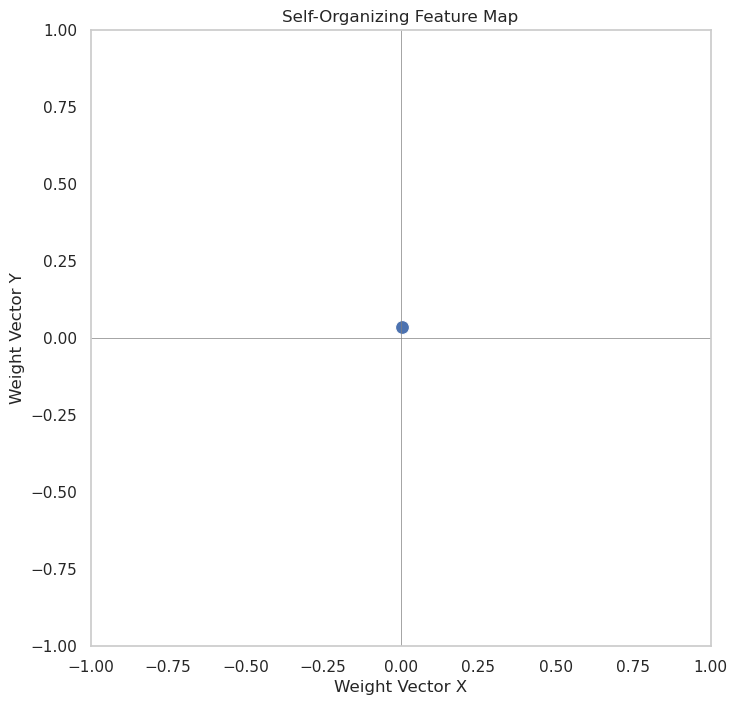

In [10]:
import random
import seaborn as sns
import matplotlib.pyplot as plt

# Set random seed for reproducibility
random.seed(42)

# Parameters
num_neurons = 25  # 5x5 grid of neurons
num_iterations = 1000
initial_learning_rate = 0.1
initial_radius = 2

# Initialize weight vectors for the neurons
weights = [[random.uniform(-1, 1) for _ in range(2)] for _ in range(num_neurons)]

# Function to calculate the distance between two vectors
def distance(vec1, vec2):
    return ((vec1[0] - vec2[0]) ** 2 + (vec1[1] - vec2[1]) ** 2) ** 0.5

# Function to find the winning neuron
def find_winner(input_vector):
    return min(range(num_neurons), key=lambda i: distance(weights[i], input_vector))

# Function to update weights
def update_weights(input_vector, winner_index, iteration, radius):
    learning_rate = initial_learning_rate * (1 - iteration / num_iterations)
    for i in range(num_neurons):
        if distance(weights[i], weights[winner_index]) <= radius:
            weights[i][0] += learning_rate * (input_vector[0] - weights[i][0])
            weights[i][1] += learning_rate * (input_vector[1] - weights[i][1])

# Training the SOFM
for iteration in range(num_iterations):
    # Generate a random input vector
    input_vector = [random.uniform(-1, 1), random.uniform(-1, 1)]
    
    # Find the winning neuron
    winner_index = find_winner(input_vector)
    
    # Update the weights of the winning neuron and its neighbors
    radius = initial_radius * (1 - iteration / num_iterations)
    update_weights(input_vector, winner_index, iteration, radius)

# Prepare data for plotting
weights_x = [w[0] for w in weights]
weights_y = [w[1] for w in weights]

# Plotting the results using Seaborn
plt.figure(figsize=(8, 8))
sns.scatterplot(x=weights_x, y=weights_y, s=100)
plt.title('Self-Organizing Feature Map')
plt.xlabel('Weight Vector X')
plt.ylabel('Weight Vector Y')
plt.axhline(0, color='grey', lw=0.5)
plt.axvline(0, color='grey', lw=0.5)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.grid()
plt.show()


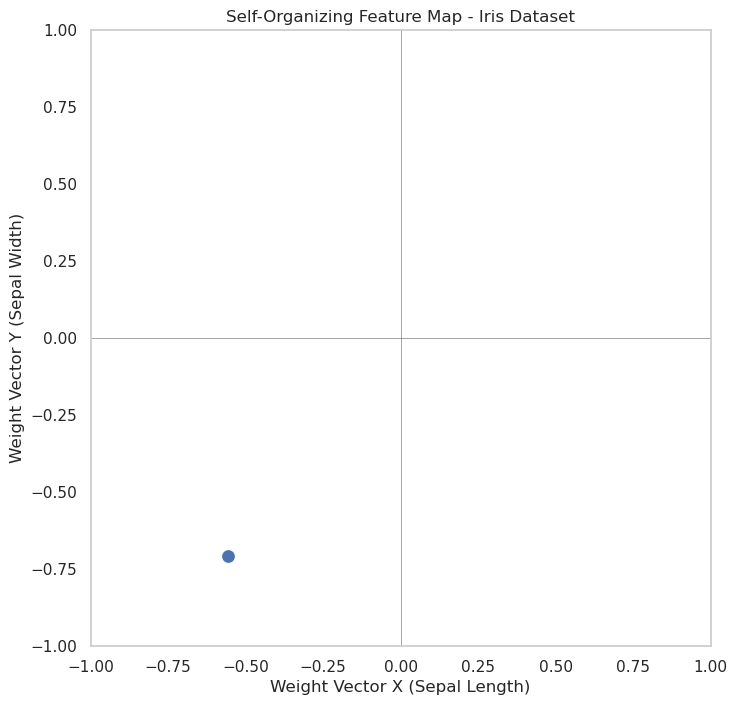

In [11]:
import random
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
data = iris.data[:, :2]  # Use only the first two features (sepal length and sepal width)

# Parameters
num_neurons = 25  # 5x5 grid of neurons
num_iterations = 1000
initial_learning_rate = 0.1
initial_radius = 2

# Initialize weight vectors for the neurons
weights = [[random.uniform(-1, 1) for _ in range(2)] for _ in range(num_neurons)]

# Function to calculate the distance between two vectors
def distance(vec1, vec2):
    return ((vec1[0] - vec2[0]) ** 2 + (vec1[1] - vec2[1]) ** 2) ** 0.5

# Function to find the winning neuron
def find_winner(input_vector):
    return min(range(num_neurons), key=lambda i: distance(weights[i], input_vector))

# Function to update weights
def update_weights(input_vector, winner_index, iteration, radius):
    learning_rate = initial_learning_rate * (1 - iteration / num_iterations)
    for i in range(num_neurons):
        if distance(weights[i], weights[winner_index]) <= radius:
            weights[i][0] += learning_rate * (input_vector[0] - weights[i][0])
            weights[i][1] += learning_rate * (input_vector[1] - weights[i][1])

# Training the SOFM
for iteration in range(num_iterations):
    # Randomly select an input vector from the dataset
    input_vector = data[random.randint(0, len(data) - 1)]
    
    # Find the winning neuron
    winner_index = find_winner(input_vector)
    
    # Update the weights of the winning neuron and its neighbors
    radius = initial_radius * (1 - iteration / num_iterations)
    update_weights(input_vector, winner_index, iteration, radius)

# Prepare data for plotting
weights_x = [w[0] for w in weights]
weights_y = [w[1] for w in weights]

# Plotting the results using Seaborn
plt.figure(figsize=(8, 8))
sns.scatterplot(x=weights_x, y=weights_y, s=100)
plt.title('Self-Organizing Feature Map - Iris Dataset')
plt.xlabel('Weight Vector X (Sepal Length)')
plt.ylabel('Weight Vector Y (Sepal Width)')
plt.axhline(0, color='grey', lw=0.5)
plt.axvline(0, color='grey', lw=0.5)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.grid()
plt.show()


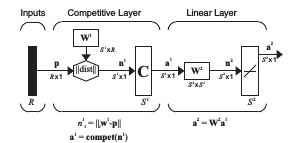
Figure.13 LVQ Network

# Learning Vector Quantization (LVQ) Network

As with the competitive network, each neuron in the first layer of the LVQ network learns a prototype vector, which allows it to classify a region of the input space. However, instead of computing the proximity of the input and weight vectors by using the inner product, we will simulate the LVQ networks by calculating the distance directly. 

One advantage of calculating the distance directly is that vectors need not be normalized. When the vectors are normalized, the response of the network will be the same, whether the inner product is used or the distance is directly calculated. The net input of the first layer of the LVQ will be 

$$
n_i = - \frac{1}{||w_i - p||}
$$

or, in vector form,

$$
\mathbf{n} = - \begin{bmatrix} ||\mathbf{w}_1 - \mathbf{p}|| \\ ||\mathbf{w}_2 - \mathbf{p}|| \\ \vdots \\ ||\mathbf{w}_S - \mathbf{p}|| \end{bmatrix}
$$

The output of the first layer of the LVQ is 

$$
\mathbf{a} = \text{compet}(\mathbf{n})
$$

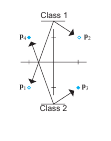

Therefore, the neuron whose weight vector is closest to the input vector will output a 1, and the other neurons will output 0. Thus far, the LVQ network behaves exactly like the competitive network (at least for normalized vectors). 

There is a difference in interpretation, however. In the competitive network, the neuron with the nonzero output indicates which class the input vector belongs to. For the LVQ network, the class winning neuron indicates a subclass rather than a class. There may be several different neurons (subclasses) that make up each class. 

The second layer of the LVQ network is used to combine subclasses into a single class. This is done with the weight matrix \( \mathbf{W}^2 \). The columns of \( \mathbf{W}^2 \) represent subclasses, and the rows represent classes. \( \mathbf{W}^2 \) has a single 1 in each column, with the other elements set to zero. The row in which the 1 occurs indicates which class the appropriate subclass belongs to.

$$
\text{If } w_{ki} = 1 \Rightarrow \text{subclass } i \text{ is a part of class } k
$$

The process of combining subclasses to form a class allows the LVQ network to create complex class boundaries. A standard competitive layer has the limitation that it can only create decision regions that are convex. The LVQ network overcomes this limitation. 

## LVQ Learning

The learning in the LVQ network combines competitive learning with supervision. As with all supervised learning algorithms, it requires a set of examples of proper network behavior: 

$$
\{(p_1, t_1), (p_2, t_2), \ldots, (p_Q, t_Q)\}
$$

Each target vector must contain only zeros, except for a single 1. The row in which the 1 appears indicates the class to which the input vector belongs. For example, if we have a problem where we would like to classify a particular three-element vector into the second of four classes, we can express this as 

$$
p_1 = \begin{bmatrix} 0 \\ 1 \\ 0 \\ 0 \end{bmatrix}, \quad t_1 = \begin{bmatrix} 0 \\ 1 \\ 0 \\ 0 \end{bmatrix}
$$

Before learning can occur, each neuron in the first layer is assigned to an output neuron. This generates the matrix $ \mathbf{W}^2 $. Typically, equal numbers of hidden neurons are connected to each output neuron, so that each class can be made up of the same number of convex regions. 

All elements of $ \mathbf{W}^2 $ are set to zero, except for the following:

$$
\text{If hidden neuron } i \text{ is to be assigned to class } k, \text{ then set } w_{ki} = 1.
$$

Once $ \mathbf{W}^2 $ is defined, it will never be altered. The hidden weights are trained with a variation of the Kohonen rule. 

The LVQ learning rule proceeds as follows: 

1. At each iteration, an input vector $ p $ is presented to the network, and the distance from $ p $ to each prototype vector is computed. 
2. The hidden neurons compete, and neuron $ i^* $ wins the competition, so the $ i^* $-th element of $ \mathbf{a} $ is set to 1. 
3. Next, $ \mathbf{a} $ is multiplied by $ \mathbf{W}^2 $ to get the final output $ \mathbf{a}^2 $, which also has only one nonzero element, $ k^* $, indicating that $ p $ is being assigned to class $ k^* $.

The Kohonen rule is used to improve the hidden layer of the LVQ network in two ways. 

- **Correct Classification**: If \( p \) is classified correctly, then we move the weights of the winning hidden neuron toward \( p \):

$$
\mathbf{w}_{i^*}(q) = \mathbf{w}_{i^*}(q - 1) + \alpha (p(q) - \mathbf{w}_{i^*}(q - 1)), \quad \text{if } a_{k^*} = t_{k^*} = 1
$$

- **Incorrect Classification**: If $p $ was classified incorrectly, then we know that the wrong hidden neuron won the competition, and therefore we move its weights $ \mathbf{w}_{i^*} $ away from $ p $:

$$
\mathbf{w}_{i^*}(q) = \mathbf{w}_{i^*}(q - 1) - \alpha (p(q) - \mathbf{w}_{i^*}(q - 1)), \quad \text{if } a_{k^*} = 1 \neq t_{k^*} = 0
$$

The result will be that each hidden neuron moves toward vectors that fall into the class for which it forms a subclass and away from vectors that fall into other classes.

### Example of LVQ Training

We would like to train an LVQ network to solve the following classification problem:

- Class 1: 
$$
p_1 = \begin{bmatrix} -1 \\ 1 \end{bmatrix}
$$ 
- Class 2: 
$$
p_3 = \begin{bmatrix} 1 \\ -1 \end{bmatrix}
$$

We begin by assigning target vectors to each input:

$$
t_1 = \begin{bmatrix} 1 \\ 0 \end{bmatrix}, \quad t_2 = \begin{bmatrix} 1 \\ 0 \end{bmatrix}
$$

$$
t_3 = \begin{bmatrix} 0 \\ 1 \end{bmatrix}, \quad t_4 = \begin{bmatrix} 0 \\ 1 \end{bmatrix}
$$

We now must choose how many subclasses will make up each of the two classes. If we let each class be the union of two subclasses, we will end up with four neurons in the hidden layer. The output layer weight matrix will be 

$$
\mathbf{W}^2 = \begin{bmatrix} 1 & 1 \\ 0 & 0 \\ 0 & 0 \\ 1 & 1 \end{bmatrix}
$$

This connects hidden neurons 1 and 2 to output neuron 1 and connects hidden neurons 3 and 4 to output neuron 2. Each class will be made up of two convex regions. 

The row vectors in $ \mathbf{W}^2 $ are initially set to random values. The weights belonging to the two hidden neurons that define class 1 are marked with hollow circles. The weights defining class 2 are marked with solid circles. 

The initial values for these weights are 

$$
\mathbf{w}_1 = -0.543, \quad \mathbf{w}_2 = -0.969, \quad \mathbf{w}_3 = 0.997, \quad \mathbf{w}_4 = 0.456
$$


# Learning Vector Quantization (LVQ) Network

At each iteration of the training process, we present an input vector, find its response, and then adjust the weights. In this case, we will begin by presenting \( p_3 \):

$$
\begin{pmatrix}
-1 \\
1
\end{pmatrix} - p_3
$$

The response of the competitive layer is computed as follows:

$$
a = \text{compet}(n) = \text{compet}\left( 
\begin{pmatrix}
- w_1 - p_3 \\
- w_2 - p_3 \\
- w_3 - p_3 \\
- w_4 - p_3
\end{pmatrix} 
\right)
$$

Where

$$
\begin{pmatrix}
w_1^T & -1 & -1 \\
-0.543 & 0.840 & -1 & -1 \\
-0.969 & -0.249 & -1 & -1 \\
0.997 & 0.094 & -1 & -1 \\
-0.456 & 0.954 & -1 & -1
\end{pmatrix}
$$

Calculating the inner products:

$$
\begin{align*}
- w_1^T - p_3 & : -2.40 \\
- w_2^T - p_3 & : -2.11 \\
- w_3^T - p_3 & : -1.09 \\
- w_4^T - p_3 & : -2.03 
\end{align*}
$$

The third hidden neuron has the closest weight vector to $ p_3 $. In order to determine which class this neuron belongs to, we multiply $ a $ by $ W $:

$$
\begin{align*}
a = W \cdot a = 
\begin{pmatrix}
1 & 1 & 0 & 0 \\
0 & 0 & 1 & 1
\end{pmatrix}
\begin{pmatrix}
0 \\
2 \\
1 \\
0
\end{pmatrix} 
= 
\begin{pmatrix}
0 \\
1
\end{pmatrix}
\end{align*}
$$

This output indicates that $ p_3 $ is a member of class 2. This is correct, so we update $ w_3 $ by moving it toward $ p_3 $:

$$
w_3(1) = w_3(0) + \alpha \left( p_3 - w_3(0) \right)
$$

Calculating the update:

$$
\begin{align*}
= \begin{pmatrix}
0.997 \\
0.094
\end{pmatrix} + 0.5 \left( 
\begin{pmatrix}
1 \\
-1
\end{pmatrix} - \begin{pmatrix}
0.997 \\
0.094
\end{pmatrix} 
\right)
= \begin{pmatrix}
0.998 \\
0.094
\end{pmatrix}
\end{align*}
$$

The diagram on the left side of Figure 16.14 shows the weights after \( w_3 \) was updated on the first iteration. The diagram on the right side of Figure 16.14 shows the weights after the algorithm has converged. The regions that will be classified as class 1 are shown in gray, and the regions that will be classified as class 2 are shown in blue.


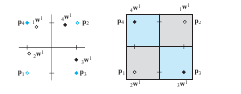

Figure.14 After First and Many Iterations

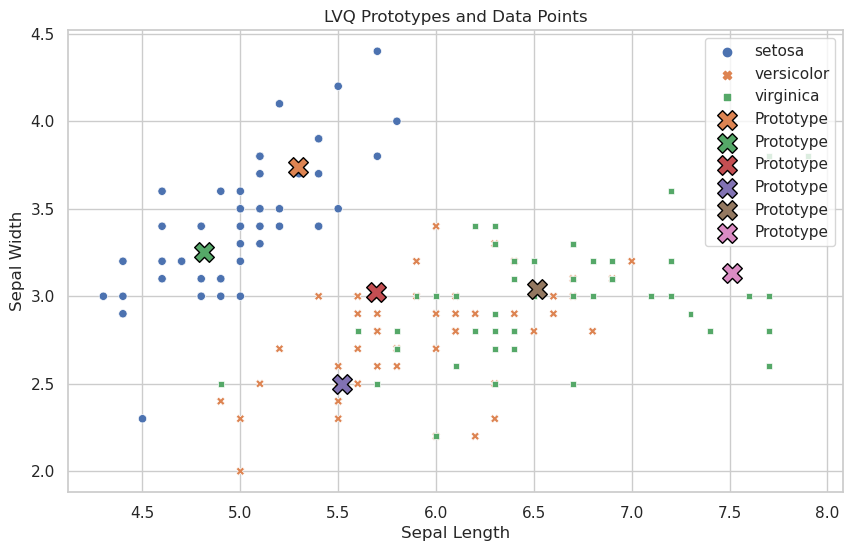

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = sns.load_dataset('iris')

# Extract features and labels
X = iris[['sepal_length', 'sepal_width']].values
y = iris['species'].values

# Initialize LVQ parameters
class_names = iris['species'].unique()
n_classes = len(class_names)
n_prototypes_per_class = 2  # Number of prototypes per class
learning_rate = 0.1
n_epochs = 10  # Number of training epochs

# Initialize prototype weights
prototypes = []
for class_name in class_names:
    prototypes.extend([X[y == class_name][i] for i in range(n_prototypes_per_class)])
prototypes = np.array(prototypes)

# Function to calculate distance
def calculate_distance(p, w):
    return np.linalg.norm(p - w)

# LVQ learning algorithm
for epoch in range(n_epochs):
    for i in range(len(X)):
        input_vector = X[i]
        true_class = y[i]
        
        # Find the nearest prototype
        distances = [calculate_distance(input_vector, proto) for proto in prototypes]
        winner_index = np.argmin(distances)
        winner_prototype = prototypes[winner_index]
        
        # Determine if the winner is correct
        predicted_class = class_names[winner_index // n_prototypes_per_class]
        
        # Update the winning prototype
        if predicted_class == true_class:
            prototypes[winner_index] += learning_rate * (input_vector - winner_prototype)
        else:
            prototypes[winner_index] -= learning_rate * (input_vector - winner_prototype)

# Plot the prototypes and the input data
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, style=y, palette="deep")
for proto in prototypes:
    plt.scatter(proto[0], proto[1], s=200, edgecolor='black', marker='X', label='Prototype')

plt.title("LVQ Prototypes and Data Points")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()
plt.show()


# Improving LVQ Networks (LVQ2)

The Learning Vector Quantization (LVQ) network, particularly LVQ2, addresses some limitations of its predecessor. The main issues encountered are:

1. **Dead Neurons**:
   - Similar to competitive layers, a hidden neuron in an LVQ network might have initial weight values that prevent it from winning the competition. This leads to a "dead neuron" that never contributes effectively to the network.
   - To resolve this, a *conscience mechanism* is employed. This mechanism ensures that every neuron has an opportunity to adjust its weights, preventing any neuron from becoming inactive.

2. **Weight Vector Movement**:
   - Depending on the arrangement of initial weight vectors, a neuron may need to traverse through regions of the input space that do not belong to its class in order to reach the appropriate region. 
   - This traversal is problematic as the weights of the neuron will be repulsed by vectors in the incorrect region, which may hinder proper classification.

To address these issues, the following modifications to the Kohonen rule are implemented:

- **Weight Adjustment**:
  - If the winning neuron incorrectly classifies the current input, its weight vector is moved away from the input vector, as is standard in the LVQ approach.
  - Additionally, the weights of the closest neuron to the input vector that correctly classifies it are adjusted. The weights of this second neuron are moved toward the input vector.

This results in the following weight update rules:

- When the network correctly classifies an input vector:
  $$
  \mathbf{w}_{\text{winner}} \leftarrow \mathbf{w}_{\text{winner}} + \alpha (\mathbf{x} - \mathbf{w}_{\text{winner}})
  $$

- When the input vector is incorrectly classified:
  - For the winning neuron:
  $$
  \mathbf{w}_{\text{winner}} \leftarrow \mathbf{w}_{\text{winner}} - \alpha (\mathbf{x} - \mathbf{w}_{\text{winner}})
  $$
  
  - For the closest correctly classifying neuron:
  $$
  \mathbf{w}_{\text{closest}} \leftarrow \mathbf{w}_{\text{closest}} + \alpha (\mathbf{x} - \mathbf{w}_{\text{closest}})
  $$

The resulting algorithm is known as **LVQ2** and effectively enhances the performance of the LVQ networks by addressing the dead neuron issue and ensuring proper classification by adjusting weights of two neurons in case of misclassification.


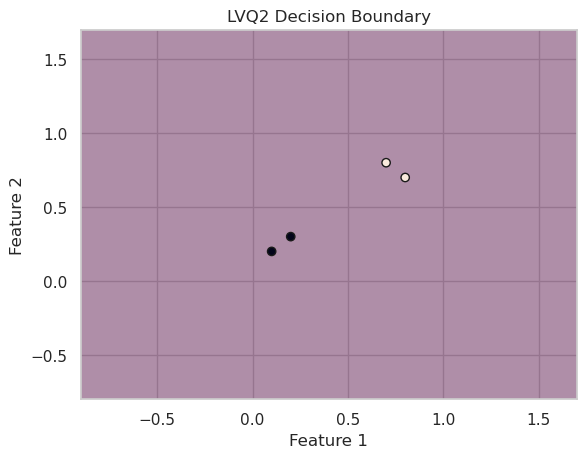

In [15]:
import random
import matplotlib.pyplot as plt
import numpy as np  # Import NumPy for array handling

class LVQ2:
    def __init__(self, n_neurons, n_features, learning_rate=0.1):
        self.n_neurons = n_neurons
        self.n_features = n_features
        self.learning_rate = learning_rate
        self.weights = self.initialize_weights()
        self.class_labels = []  # To keep track of class labels for each neuron

    def initialize_weights(self):
        """Initialize weight vectors randomly within the range of input features."""
        return [[random.uniform(-1, 1) for _ in range(self.n_features)] for _ in range(self.n_neurons)]

    def euclidean_distance(self, a, b):
        """Calculate the Euclidean distance between two vectors."""
        return sum((x - y) ** 2 for x, y in zip(a, b)) ** 0.5

    def find_winner(self, input_vector):
        """Find the index of the winning neuron based on the input vector."""
        distances = [self.euclidean_distance(input_vector, weight) for weight in self.weights]
        return distances.index(min(distances))

    def train(self, X, y, epochs):
        """Train the LVQ2 model."""
        # Initialize class labels for the neurons
        self.class_labels = [None] * self.n_neurons
        
        for epoch in range(epochs):
            for input_vector, label in zip(X, y):
                # Find the winning neuron
                winner_idx = self.find_winner(input_vector)

                # Update the class label for the winning neuron if it's not set
                if self.class_labels[winner_idx] is None:
                    self.class_labels[winner_idx] = label

                # Check if the classification is correct
                if self.class_labels[winner_idx] == label:
                    # Update the winning neuron's weights toward the input vector
                    self.weights[winner_idx] = [
                        w + self.learning_rate * (x - w) for w, x in zip(self.weights[winner_idx], input_vector)
                    ]
                else:
                    # Update the winning neuron's weights away from the input vector
                    self.weights[winner_idx] = [
                        w - self.learning_rate * (x - w) for w, x in zip(self.weights[winner_idx], input_vector)
                    ]

                    # Update the closest neuron that correctly classifies the input vector
                    closest_idx = self.find_winner(input_vector)  # Find the closest neuron that correctly classifies it
                    if self.class_labels[closest_idx] == label:
                        self.weights[closest_idx] = [
                            w + self.learning_rate * (x - w) for w, x in zip(self.weights[closest_idx], input_vector)
                        ]

    def predict(self, input_vector):
        """Predict the class of an input vector."""
        winner_idx = self.find_winner(input_vector)
        return self.class_labels[winner_idx]

    def plot_decision_boundary(self, X, y):
        """Plot the decision boundary created by the trained model."""
        x_min, x_max = min([point[0] for point in X]) - 1, max([point[0] for point in X]) + 1
        y_min, y_max = min([point[1] for point in X]) - 1, max([point[1] for point in X]) + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

        Z = np.array([self.predict([x1, x2]) for x1, x2 in zip(xx.ravel(), yy.ravel())])
        Z = Z.reshape(xx.shape)  # Reshape to the meshgrid shape

        plt.contourf(xx, yy, Z, alpha=0.5)
        plt.scatter([point[0] for point in X], [point[1] for point in X], c=y, edgecolors='k', marker='o')
        plt.title('LVQ2 Decision Boundary')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.show()

# Example Usage
if __name__ == "__main__":
    # Create a simple dataset (e.g., two classes)
    X = [[0.1, 0.2], [0.2, 0.3], [0.8, 0.7], [0.7, 0.8]]
    y = [0, 0, 1, 1]  # Class labels

    lvq2 = LVQ2(n_neurons=2, n_features=2, learning_rate=0.1)
    lvq2.train(X, y, epochs=100)

    # Plot the decision boundary
    lvq2.plot_decision_boundary(X, y)


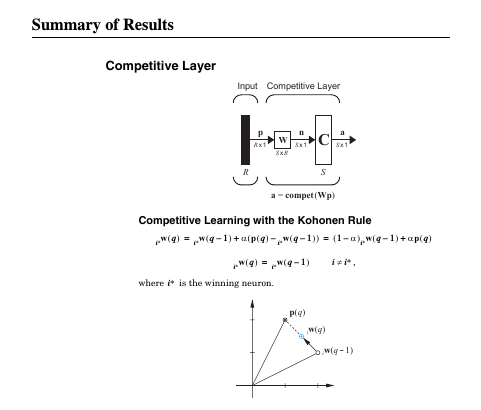

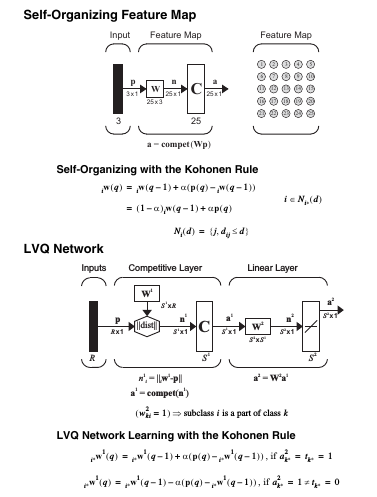

